# Equity Market & Portfolio Risk Analysis
**Role Target:** Goldman Sachs – Analyst  

This project analyzes a diversified equity portfolio to evaluate risk, return, and performance using real market data.


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



In [14]:
tickers = ['AAPL', 'MSFT', 'JPM', 'GS', 'SPY']

data = yf.download(
    tickers,
    start='2019-01-01',
    auto_adjust=True
)['Close']

data.dropna(inplace=True)
data.head()


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GS,JPM,MSFT,SPY
Date,,,,,
2019-01-02,37.538822,146.156845,81.250214,94.612595,224.995331
2019-01-03,33.799683,144.015823,80.095497,91.132004,219.626312
2019-01-04,35.242561,148.722610,83.048248,95.370468,226.982864
2019-01-07,35.164116,149.546753,83.106010,95.492119,228.772568
2019-01-08,35.834457,148.994522,82.949280,96.184494,230.921967


In [15]:
returns = data.pct_change().dropna()
returns.head()


Ticker,AAPL,GS,JPM,MSFT,SPY
Date,,,,,
2019-01-03,-0.099607,-0.014649,-0.014212,-0.036788,-0.023863
2019-01-04,0.042689,0.032682,0.036865,0.046509,0.033496
2019-01-07,-0.002226,0.005541,0.000696,0.001276,0.007885
2019-01-08,0.019063,-0.003693,-0.001886,0.007251,0.009395
2019-01-09,0.016982,0.006272,-0.001690,0.014300,0.004673


In [16]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
portfolio_returns = returns.dot(weights)
portfolio_returns.head()


Date
2019-01-03   -0.037824
2019-01-04    0.038448
2019-01-07    0.002634
2019-01-08    0.006026
2019-01-09    0.008107
dtype: float64

In [17]:
volatility = portfolio_returns.std() * np.sqrt(252)
volatility


np.float64(0.23437884277134835)

### Volatility

Volatility measures the degree of variation in portfolio returns over time.  
Annualized volatility helps assess the overall risk level of the portfolio and compare it against market benchmarks.


In [18]:
cov_matrix = np.cov(portfolio_returns, returns['SPY'])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]
beta


np.float64(1.1270881090709308)

### Beta

Beta measures the sensitivity of the portfolio to movements in the overall market (S&P 500).  
A beta less than 1 indicates the portfolio is less volatile than the market, while a beta greater than 1 implies higher market risk.


In [19]:
VaR_95 = norm.ppf(0.05, portfolio_returns.mean(), portfolio_returns.std())
VaR_95


np.float64(-0.02323728776089228)

### Value at Risk (VaR)

Value at Risk estimates the maximum expected loss of the portfolio over a given time horizon at a specified confidence level.  
At the 95% confidence level, VaR indicates the worst daily loss expected under normal market conditions.


In [20]:
risk_free_rate = 0.04 / 252

sharpe_ratio = ((portfolio_returns.mean() - risk_free_rate) /
                portfolio_returns.std()) * np.sqrt(252)

sharpe_ratio


np.float64(0.9562558096534267)

### Sharpe Ratio

The Sharpe Ratio evaluates the portfolio’s risk-adjusted return by comparing excess returns to volatility.  
A higher Sharpe Ratio indicates more efficient return generation per unit of risk.


In [21]:
cumulative_portfolio = (1 + portfolio_returns).cumprod()

rolling_max = cumulative_portfolio.cummax()
drawdown = (cumulative_portfolio - rolling_max) / rolling_max

drawdown.min()


np.float64(-0.3549202567321814)

### Maximum Drawdown

Maximum drawdown measures the largest peak-to-trough decline in the portfolio’s value.  
It provides insight into downside risk and the portfolio’s ability to withstand market downturns.


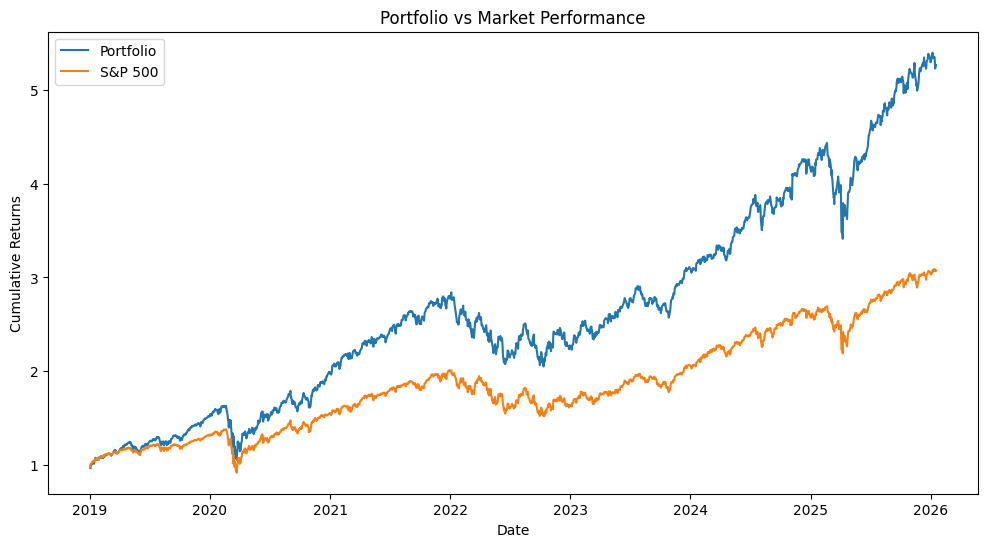

In [22]:
cumulative_market = (1 + returns['SPY']).cumprod()

plt.figure(figsize=(12,6))
plt.plot(cumulative_portfolio, label='Portfolio')
plt.plot(cumulative_market, label='S&P 500')
plt.legend()
plt.title('Portfolio vs Market Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


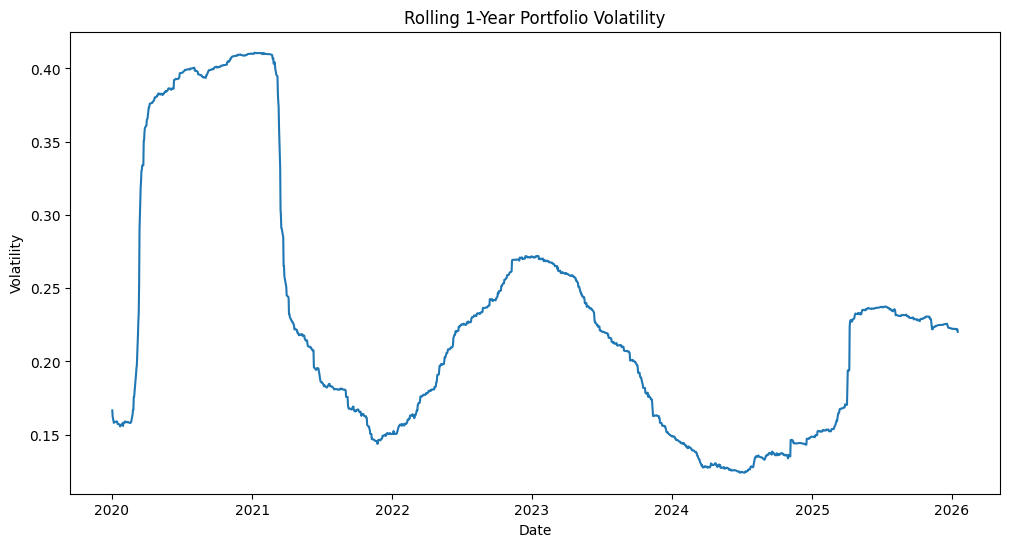

In [23]:
rolling_volatility = portfolio_returns.rolling(252).std() * np.sqrt(252)

plt.figure(figsize=(12,6))
plt.plot(rolling_volatility)
plt.title('Rolling 1-Year Portfolio Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


### Rolling Volatility

This metric captures time-varying portfolio risk and highlights periods of heightened market uncertainty.


In [24]:
stress_return = portfolio_returns - 0.10
stress_loss = stress_return.mean()

stress_loss


np.float64(-0.09895188043627005)

### Stress Testing

A stress scenario was simulated by applying a 10% shock to portfolio returns to evaluate downside resilience under extreme market conditions.


### Portfolio vs Market Performance

This visualization compares the cumulative returns of the portfolio against the S&P 500.  
It helps evaluate whether diversification and asset allocation improved performance relative to the market.
